# FOMC Statements

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

## Preparing the data

In [6]:
path = Path('fomcscrape')

In [7]:
path.ls()

[PosixPath('fomcscrape/fomcscrape3.csv'),
 PosixPath('fomcscrape/data_clas_export.pkl'),
 PosixPath('fomcscrape/.ipynb_checkpoints'),
 PosixPath('fomcscrape/models'),
 PosixPath('fomcscrape/data_lm_export.pkl')]

In [8]:
bs=16

In [9]:
df = pd.read_csv(path/'fomcscrape3.csv')
df.head()

,decision,text
0,hold,Chairman Alan Greenspan announced today that t...
1,raise,Chairman Alan Greenspan announced today that t...
2,hold,The Federal Reserve today announced two action...
3,hold,Chairman Alan Greenspan announced today that t...
4,raise,The Federal Reserve announced today the follow...


In [10]:
data_lm = TextLMDataBunch.from_csv(path, 'fomcscrape3.csv')

In [11]:
data_lm.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',',
 'of',
 '.',
 'and',
 'to',
 'in',
 '\n ',
 ';',
 'committee',
 'that']

In [12]:
data_lm.train_ds[0][0].data[:10]

array([  2,   5,  73, 376, 183,   9,   5,  20,   5,  68])

In [13]:
data_clas = TextClasDataBunch.from_csv(path, 'fomcscrape3.csv', vocab=data_lm.train_ds.vocab, bs=16)

In [14]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [13]:
# torch.cuda.empty_cache()

In [15]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [16]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.509479,2.008294,0.582282,00:05


In [17]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(1496, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(1496, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=1496, bias=True)
    (output_dp): RNNDropout()
  )
)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


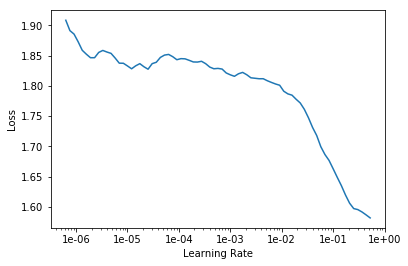

In [19]:
learn.recorder.plot(skip_end=15)

In [20]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.311688,1.239032,0.727874,00:06
1,0.845400,1.022311,0.786356,00:06
2,0.587982,0.993435,0.800028,00:06
3,0.422144,0.998061,0.805301,00:06
4,0.308813,0.984109,0.814704,00:06
5,0.227189,0.966511,0.817215,00:06
6,0.168634,0.961246,0.822768,00:06
7,0.140863,0.945025,0.822852,00:06
8,0.110264,0.943607,0.824861,00:07
9,0.088628,0.938841,0.825474,00:07


In [21]:
learn.save('fomcs1')

In [22]:
learn.save_encoder('ft_enc')

In [23]:
learn.predict("Information received since", n_words=20)

'Information received since the Federal Open Market Committee met in January indicates that the labor market has continued'

## Classifier

In [24]:
bs=8

In [25]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [26]:
learn.load_encoder('ft_enc')

In [27]:
data_clas.show_batch()

text,target
"xxbos xxmaj for immediate release \n xxmaj the xxmaj federal xxmaj open xxmaj market xxmaj committee decided today to raise its target for the federal funds rate by 25 basis points to 2 - 1 / 4 percent . \n xxmaj the xxmaj committee believes that , even after this action , the stance of monetary policy remains accommodative and , coupled with robust underlying growth in productivity",raise
"xxbos xxmaj for immediate release \n xxmaj the xxmaj federal xxmaj open xxmaj market xxmaj committee decided today to raise its target for the federal funds rate by 25 basis points to 1 - 1 / 2 percent . \n xxmaj the xxmaj committee believes that , even after this action , the stance of monetary policy remains accommodative and , coupled with robust underlying growth in productivity",raise
"xxbos xxmaj for immediate release \n xxmaj the xxmaj federal xxmaj open xxmaj market xxmaj committee decided today to lower its target for the federal funds rate by 25 basis points to 1 percent . xxmaj in a related action , the xxmaj board of xxmaj governors approved a 25 basis point reduction in the discount rate to 2 percent . \n xxmaj the xxmaj committee continues to",hold
"xxbos xxmaj for immediate release \n xxmaj the xxmaj federal xxmaj open xxmaj market xxmaj committee decided today to raise its target for the federal funds rate by 25 basis points to 1 - 3 / 4 percent . \n xxmaj the xxmaj committee believes that , even after this action , the stance of monetary policy remains accommodative and , coupled with robust underlying growth in productivity",raise
"xxbos xxmaj for immediate release \n xxmaj the xxmaj federal xxmaj open xxmaj market xxmaj committee decided today to raise its target for the federal funds rate by 25 basis points to 1 - 1 / 4 percent . xxmaj the xxmaj committee believes that , even after this action , the stance of monetary policy remains accommodative and , coupled with robust underlying growth in productivity , is",raise


In [28]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.010874,0.867342,0.764706,00:22


In [29]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.732955,0.824972,0.764706,00:20


In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


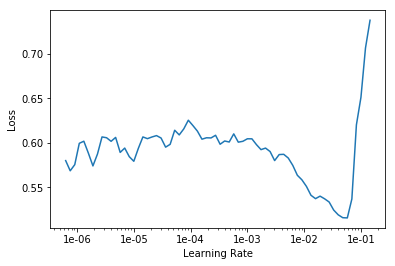

In [31]:
learn.recorder.plot(skip_end=15)

In [34]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 3e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.423288,0.898335,0.764706,00:27


In [42]:
#Powell Speech on Monetary Policy
learn.predict("Seventy-five years ago this month, the foremost economic and policy minds of their generation gathered in a sleepy mountain town in New England. While World War II still raged, they envisioned a new international monetary system with rules, procedures, and institutions—including the International Monetary Fund (IMF) and the World Bank—to promote recovery and stability in a war-ravaged world. Today we gather in Paris, the City of Light, to recognize their vision. The Bretton Woods institutions played a pivotal role after the war in rebuilding economies and in facilitating the international economic relations that are essential to prosperity. Generations later, the World Bank and the IMF continue to play important roles in fostering global monetary cooperation, financial stability, and international trade, as well as in promoting sustainable economic growth and reducing poverty. In 1944, those who sat around the table at the Mount Washington Hotel knew that the trauma and tragedy of the war and the Great Depression had fundamentally altered the economic systems that preceded them. For us, around our dinner tables tonight, a decade has passed since the Global Financial Crisis. Although in no way comparable to the devastating events of the 1930s and 1940s, the crisis represents the deepest and broadest financial upheaval since that era, and in many ways, we, too, are grappling with a changed world. Today's conference has looked at this post-crisis environment and the issues we now face from many angles. I am grateful to the Banque de France for organizing this important event and to the outstanding speakers for their deep insights. Tonight I will offer some thoughts on this new environment. I will begin with a discussion of current economic conditions in the United States, and then highlight some significant structural changes in the environment facing monetary policymakers in the post-crisis era. Finally, I will consider how these structural changes are affecting the framework in which we conduct monetary policy, highlighting the Federal Reserve System's ongoing review of our monetary policy strategy, tools, and communications.The U.S. economy is now in its 11th consecutive year of growth. Unemployment has steadily declined from its 10 percent post-crisis peak and has now remained at or below 4 percent for more than a year, the longest stretch in a half century. A strong labor market with plentiful job openings has supported labor force participation. After rising only grudgingly early in the recovery, wages have moved up the past few years. Some groups, such as African Americans, Hispanics, and rural Americans, continue to face long-standing challenges, but the benefits of this strong job market are increasingly widely shared. At outreach events we are holding across the United States, we are hearing loud and clear that this long recovery is now benefiting low- and moderate-income communities to a greater extent than has been felt for decades. Many people who have struggled to stay in the workforce are now getting an opportunity to add new and better chapters to their life stories.Solid growth has sustained this strong labor market. Most recently, U.S. gross domestic product (GDP) increased at an annual rate of just over 3 percent in the first quarter, similar to last year's strong pace. But first-quarter growth was driven largely by net exports and inventories—two volatile spending categories that are typically not dependable indicators of ongoing momentum. Indeed, overall growth in the second quarter appears to have moderated. Growth in consumer spending, which was soft in the first quarter, looks to have bounced back, but business fixed investment growth seems to have slowed notably. Moreover, the manufacturing sector has been weak since the beginning of the year, in part weighed down by the softer business spending, weaker growth in the global economy, and, as our business contacts tell us, concerns about trade tensions.Despite low unemployment and solid overall growth, inflation pressures remain muted. After running close to the Federal Open Market Committee's (FOMC) symmetric 2 percent objective over much of last year, both overall consumer price inflation and core inflation moved down earlier this year. We currently estimate that the change in the core personal consumption expenditures (PCE) price index was 1.7 percent over the 12 months ending in June. In our baseline outlook, we expect growth in the United States to remain solid, labor markets to stay strong, and inflation to move back up and run near 2 percent. Uncertainties about this outlook have increased, however, particularly regarding trade developments and global growth. In addition, issues such as the U.S. federal debt ceiling and Brexit remain unresolved. FOMC participants have also raised concerns about a more prolonged shortfall in inflation below our 2 percent target. Market-based measures of inflation compensation have shifted down, and some survey-based expectations measures are near the bottom of their historical ranges.Many FOMC participants judged at the time of our most recent meeting in June that the combination of these factors strengthens the case for a somewhat more accommodative stance of policy. We are carefully monitoring these developments and assessing their implications for the U.S economic outlook and inflation, and will act as appropriate to sustain the expansion, with a strong labor market and inflation near its symmetric 2 percent objective. We will also assess these developments in the context of the broader structural changes monetary policymakers have been facing since the Great Recession. I will focus on three tonight: the changed macroeconomic backdrop, the expanded toolkit, and the heightened focus on communication and transparency. In the United States, from the mid-1980s to right before the Great Recession, PCE inflation averaged 2.6 percent a year, GDP growth 3.4 percent, and the interest rate on a 10-year Treasury note 6.5 percent. Since the trough of the Great Recession, average inflation and output growth are around 1 percentage point lower, and the 10-year Treasury rate has averaged 2.4 percent. These declines are not unique to the United States. Average inflation rates for the other major advanced economies have declined by almost half, while the inflation rates of major emerging market economies are less than one-fifth of what they were. Indeed, with few exceptions, we are all facing lower rates of interest, growth, and inflation. In a number of countries, including the United States, these declines have been accompanied by strong labor markets and a much lower unemployment rate.Such changes in the macroeconomic environment are significant because the long-run normal levels of inflation, output, interest rates, and the unemployment rate are important structural features by which we guide policy. Standard estimates of the natural rate of unemployment—u*—and the neutral rate of interest—r*—have been declining for 2 decades, and particularly since the crisis. Many factors are contributing to these changes—well-anchored inflation expectations in the context of improved monetary policy, demographics, globalization, slower productivity growth, greater demand for safe assets, and weaker links between unemployment and inflation. And these factors seem likely to persist. If that happens, the neutral rate of interest will remain low, and policymakers will continue to operate in an environment in which the risk of hitting the effective lower bound is much higher than before the crisis. This proximity to the lower bound poses new complications for central banks and calls for new ideas. It is true that many of these features have been with us for some time. Trend inflation, productivity, and interest rates were declining well before the crisis. But, for monetary policymakers in that era, the threat of high inflation felt proximate, the hard-fought battle to control high inflation having been just recently won. Technological progress seemed likely to continue to sustain rapid increases in productivity—an outcome we continue to await. And the effective lower bound for interest rates was mainly a theoretical concern, except of course in Japan. The changes to the macroeconomic environment may have been in train earlier, but the crisis seems to have accelerated the process. The world in which policymakers are now operating is discretely different in important ways from the one before the Great Recession. I should also note, as is fitting given this event and this audience, that since the crisis policymakers are even more keenly aware of the relevance of global factors to our policies. The global nature of the financial crisis and the channels through which it spread sharply highlight the interconnectedness of our economic, financial, and policy environments. U.S. economic developments affect the rest of the world, and the reverse is also true. For example, the stresses surrounding the euro crisis and, later, the China-related volatility events in 2015 and 2016 led to a general pullback in demand for risky assets that put downward pressure on U.S. interest rates and weighed on U.S. confidence and growth. In addition, we have seen how monetary policy in one country can influence economic and financial conditions in others through financial markets, trade, and confidence channels. Pursuing our domestic mandates in this new world requires that we understand the anticipated effects of these interconnections and incorporate them into our policy decisionmaking. A second important feature of this new world is the tools central bankers now have to fight recessions. In the face of the dramatic economic and financial collapse during the crisis, policymakers quickly exhausted conventional monetary policy tools and employed a range of unconventional measures to support their economies. In the United States, these measures included new forms of forward guidance and a range of balance sheet policies. Broadly across different economies, so-called unconventional monetary policies have generally been successful at lowering interest rates and supporting economic recovery, though cyclical and structural headwinds have made achieving our inflation targets a challenge. A legacy of the crisis is that policymakers now have a broader range of tested tools to turn to the next time the effective lower bound is reached. We must continue to assess additional strategies and tools to bolster our economies and meet our inflation and employment mandates.Finally, the crisis and Great Recession brought into stark relief the need for transparency and accountability for central banks. Central bank communication is increasingly important and increasingly challenging. It is important because clear, transparent communication about the economy, the risks, and our policy responses is critical for the effectiveness of our tools and for our accountability to the public in a democratic society. It is challenging, because we are operating in a changing macroeconomic environment with tools that, while no longer new, remain less familiar to the public. Moreover, our audience has become more varied, more attuned to our actions, and less trusting of public institutions. Gone are the days when the Federal Reserve Chair could joke, as my predecessor Alan Greenspan did, If I turn out to be particularly clear, you've probably misunderstood what I said. 1 Central banks must speak to Main Street, as well as Wall Street, in ways we have not in the past, and Main Street is listening and engaged. Where does this leave us, and how should policymakers adapt to this new environment? Recognizing challenges posed by the changing structure of the economy, the need for effective policy responses, and the importance of clear communication, central banks are taking a closer look at their strategies and the range of tools currently at their disposal. For example, the Bank of Canada examines its framework every five years as part of the renewal of its inflation-control agreement with the federal government. Canadian officials have announced the bank will assess a broad range of monetary policy frameworks ahead of the renewal in 2021 of this agreement.2 The Bank of England commissioned a review over the past year of the future of the United Kingdom's financial system and what it might mean for the bank's agenda, toolkit, and capabilities.3 For our part, the Federal Reserve is conducting, for the first time, a public review of the strategy, tools, and communications that we use to promote our goals of maximum employment and price stability.4 The heart of this review has been a series of Fed Listens events around the country, in every Reserve Bank District, to hear directly from the constituencies we serve. These events have been live-streamed on the internet. Last month, we hosted a research conference at the Federal Reserve Bank of Chicago to explore ways to more effectively and sustainably achieve our mandated goals. Beginning soon, the FOMC will devote time at its regular meetings to assessing the lessons from these events. We will publicly report the conclusions of our discussions, likely during the first half of next year.Other central banks, many represented in this room, are also looking deeply at the challenges posed by the current environment and assessing tools and strategies. I look forward to learning from your experiences and sharing ours in the coming months and years as we face the trials and opportunities of this new era. For all of us, the turmoil that preceded this new world was severe, although not as extreme as that faced by those around the table in Bretton Woods 75 years ago. Tonight let us celebrate their success and strive so that our vision for the future of the global economic and financial system proves as durable and as effective.")

(Category lower, tensor(1), tensor([1.8727e-02, 9.8094e-01, 3.3380e-04]))

In [43]:
#Powell Semiannual Report to Congress
learn.predict("Let me start by saying that my colleagues and I strongly support the goals of maximum employment and price stability that Congress has set for monetary policy. We are committed to providing clear explanations about our policies and activities. Congress has given us an important degree of independence so that we can effectively pursue our statutory goals based on objective analysis and data. We appreciate that our independence brings with it an obligation for transparency so that you and the public can hold us accountable. Today I will review the current economic situation and outlook before turning to monetary policy. I will also provide an update of our ongoing public review of our framework for setting monetary policy. Current Economic Situation and Outlook: The economy performed reasonably well over the first half of 2019, and the current expansion is now in its 11th year. However, inflation has been running below the Federal Open Market Committee's (FOMC) symmetric 2 percent objective, and crosscurrents, such as trade tensions and concerns about global growth, have been weighing on economic activity and the outlook.The labor market remains healthy. Job gains averaged 172,000 per month from January through June. This number is lower than the average of 223,000 a month last year but above the pace needed to provide jobs for new workers entering the labor force. Consequently, the unemployment rate moved down from 3.9 percent in December to 3.7 percent in June, close to its lowest level in 50 years. Job openings remain plentiful, and employers are increasingly willing to hire workers with fewer skills and train them. As a result, the benefits of a strong job market have been more widely shared in recent years. Indeed, wage gains have been greater for lower-skilled workers. That said, individuals in some demographic groups and in certain parts of the country continue to face challenges. For example, unemployment rates for African Americans and Hispanics remain well above the rates for whites and Asians. Likewise, the share of the population with a job is higher in urban areas than in rural communities, and this gap widened over the past decade. A box in the July Monetary Policy Report provides a comparison of employment and wage gains over the current expansion for individuals with different levels of education.Gross domestic product increased at an annual rate of 3.1 percent in the first quarter of 2019, similar to last year's pace. This strong reading was driven largely by net exports and inventories—components that are not generally reliable indicators of ongoing momentum. The more reliable drivers of growth in the economy are consumer spending and business investment. While growth in consumer spending was weak in the first quarter, incoming data show that it has bounced back and is now running at a solid pace. However, growth in business investment seems to have slowed notably, and overall growth in the second quarter appears to have moderated. The slowdown in business fixed investment may reflect concerns about trade tensions and slower growth in the global economy. In addition, housing investment and manufacturing output declined in the first quarter and appear to have decreased again in the second quarter. After running close to our 2 percent objective over much of last year, overall consumer price inflation, measured by the 12-month change in the price index for personal consumption expenditures (PCE), declined earlier this year and stood at 1.5 percent in May. The 12-month change in core PCE inflation, which excludes food and energy prices and tends to be a better indicator of future inflation, has also come down this year and was 1.6 percent in May. Our baseline outlook is for economic growth to remain solid, labor markets to stay strong, and inflation to move back up over time to the Committee's 2 percent objective. However, uncertainties about the outlook have increased in recent months. In particular, economic momentum appears to have slowed in some major foreign economies, and that weakness could affect the U.S. economy. Moreover, a number of government policy issues have yet to be resolved, including trade developments, the federal debt ceiling, and Brexit. And there is a risk that weak inflation will be even more persistent than we currently anticipate. We are carefully monitoring these developments, and we will continue to assess their implications for the U.S economic outlook and inflation.The nation also continues to confront important longer-run challenges. Labor force participation by those in their prime working years is now lower in the United States than in most other nations with comparable economies. As I mentioned, there are troubling labor market disparities across demographic groups and different parts of the country. The relative stagnation of middle and lower incomes and low levels of upward mobility for lower-income families are also ongoing concerns. In addition, finding ways to boost productivity growth, which leads to rising wages and living standards over the longer term, should remain a high national priority. And I remain concerned about the longer-term effects of high and rising federal debt, which can restrain private investment and, in turn, reduce productivity and overall economic growth. The longer-run vitality of the U.S. economy would benefit from efforts to address these issues. Monetary Policy: Against this backdrop, the FOMC maintained the target range for the federal funds rate at 2‑1/4 to 2-1/2 percent in the first half of this year. At our January, March, and May meetings, we stated that we would be patient as we determined what future adjustments to the federal funds rate might be appropriate to support our goals of maximum employment and price stability.At the time of our May meeting, we were mindful of the ongoing crosscurrents from global growth and trade, but there was tentative evidence that these crosscurrents were moderating. The latest data from China and Europe were encouraging, and there were reports of progress in trade negotiations with China. Our continued patient stance seemed appropriate, and the Committee saw no strong case for adjusting our policy rate.Since our May meeting, however, these crosscurrents have reemerged, creating greater uncertainty. Apparent progress on trade turned to greater uncertainty, and our contacts in business and agriculture report heightened concerns over trade developments. Growth indicators from around the world have disappointed on net, raising concerns that weakness in the global economy will continue to affect the U.S. economy. These concerns may have contributed to the drop in business confidence in some recent surveys and may have started to show through to incoming data.In our June meeting statement, we indicated that, in light of increased uncertainties about the economic outlook and muted inflation pressures, we would closely monitor the implications of incoming information for the economic outlook and would act as appropriate to sustain the expansion. Many FOMC participants saw that the case for a somewhat more accommodative monetary policy had strengthened. Since then, based on incoming data and other developments, it appears that uncertainties around trade tensions and concerns about the strength of the global economy continue to weigh on the U.S. economic outlook. Inflation pressures remain muted. The FOMC has made a number of important decisions this year about our framework for implementing monetary policy and our plans for completing the reduction of the Fed's securities holdings. At our January meeting, we decided to continue to implement monetary policy using our current policy regime with ample reserves, and emphasized that we are prepared to adjust any of the details for completing balance sheet normalization in light of economic and financial developments. At our March meeting, we communicated our intention to slow, starting in May, the decline in the Fed's aggregate securities holdings and to end the reduction in these holdings in September. The July Monetary Policy Report provides details on these decisions. The July Monetary Policy Report also includes an update on monetary policy rules. The FOMC routinely looks at monetary policy rules that recommend a level for the federal funds rate based on inflation and unemployment rates. I continue to find these rules helpful, although using these rules requires careful judgment.We are conducting a public review of our monetary policy strategy, tools, and communications—the first review of its kind for the FOMC. Our motivation is to consider ways to improve the Committee's current policy framework and to best position the Fed to achieve maximum employment and price stability. The review has started with outreach to and consultation with a broad range of people and groups through a series of Fed Listens events. The FOMC will consider questions related to the review at upcoming meetings. We will publicly report the outcome of our discussions.Thank you. I am happy to respond to your questions.")

(Category lower, tensor(1), tensor([0.0145, 0.9837, 0.0018]))

In [44]:
# Clarida july 1 Speech
learn.predict("I am delighted to be in Helsinki at this important conference on monetary policy and the future of Europe's monetary union.1 Today I would like to discuss the broad review of the Federal Reserve's monetary policy framework that my fellow policymakers and I are undertaking this year. We are examining the policy strategy, tools, and communication practices that we use to pursue our dual-mandate goals of maximum employment and price stability. In my remarks, I will describe the motivation for and scope of this review and discuss some of the events that are taking place. In our review, we are being transparent and open minded, and we are seeking perspectives from a broad range of interested individuals and groups, including academics, other specialists, and the public at large.The fact that the Federal Reserve is conducting this review does not suggest that we are dissatisfied with the existing policy framework. Indeed, we believe our existing framework has served us well, helping us effectively achieve our statutorily assigned dual-mandate goals. Nonetheless, in light of the unprecedented events of the past decade, we believe it is a good time to step back and assess whether, and in what possible ways, we can refine our strategy, tools, and communication practices to achieve and maintain these goals as consistently and robustly as possible.2 I note that central banks in other countries have conducted periodic reviews of their monetary policy frameworks, and their experience has informed the approach we are pursuing.With the U.S. economy operating at or close to maximum employment and price stability, now is an especially opportune time to conduct this review. The unemployment rate is near a 50-year low, and inflation is running close to our 2 percent objective. By conducting this review, we are ensuring that we are well positioned to continue to meet our statutory goals in coming years. In addition, the Federal Reserve used new policy tools and enhanced its communications in response to the Global Financial Crisis and the Great Recession, and the review is evaluating these changes. Furthermore, U.S. and foreign economies have significantly evolved since the pre-crisis experience that informed much of the research that provided the foundation for our current approach.Perhaps most significantly, neutral interest rates—or r*—appear to have fallen in the United States and abroad.3 Moreover, this global decline in r* is widely expected to persist for years. The decline in neutral policy rates likely reflects several factors, including aging populations, changes in risk-taking behavior, and a slowdown in technology growth. These factors' contributions are highly uncertain, but, irrespective of their precise role, the policy implications of the decline in neutral rates are important. All else being equal, a fall in neutral rates increases the likelihood that a central bank's policy rate will reach its effective lower bound (ELB) in future economic downturns. That development, in turn, could make it more difficult during downturns for monetary policy to support spending and employment, and keep inflation from falling too low. Another key development in recent decades is that inflation appears less responsive to resource slack. That is, the short-run Phillips curve appears to have flattened, implying a change in the dynamic relationship between inflation and employment.5 A flatter Phillips curve is, in a sense, a proverbial double-edged sword. It permits the Federal Reserve to support employment more aggressively during downturns—as was the case during and after the Great Recession—because a sustained inflation breakout is less likely when the Phillips curve is flatter.6 However, a flatter Phillips curve also increases the cost, in terms of economic output, of reversing unwelcome increases in longer-run inflation expectations. Thus, a flatter Phillips curve makes it all the more important that longer-run inflation expectations remain anchored at levels consistent with our 2 percent inflation objective.Finally, the strengthening of the labor market in recent years has highlighted the challenges of assessing the proximity of the labor market to full employment. The unemployment rate, which stood at 3.6 percent in May, has been interpreted by many as suggesting that the labor market is currently operating beyond full employment. However, the level of the unemployment rate that is consistent with full employment is not directly observable and thus must be estimated. I believe the range of plausible estimates extends to 4 percent or below. For example, in the Summary of Economic Projections submitted in conjunction with the June meeting of the Federal Open Market Committee (FOMC), the range of estimates for the longer-run normal unemployment rate is 3.6 to 4.5 percent.The decline in the unemployment rate in recent years has been accompanied by a pronounced increase in labor force participation for individuals in their prime working years.9 These increases in prime-age participation have provided employers with a source of additional labor input and have been one factor restraining inflationary pressures. As with the unemployment rate, whether participation will continue to increase in a tight labor market remains uncertain. The strong job gains of recent years also have delivered benefits to groups that have historically been disadvantaged in the labor market. For example, African Americans and Hispanics have experienced persistently higher unemployment rates than whites for many decades.10 However, those unemployment rate gaps have narrowed as the labor market has strengthened, and there is some indication of an extra benefit to these groups as the unemployment rate moves into very low territory.11 Likewise, although unemployment rates for less-educated workers are persistently higher than they are for their more-educated counterparts, such gaps appear to narrow as the labor market strengthens.12 And wage increases in the past couple of years have been strongest for less-educated workers and for those at the lower end of the wage distribution.In the Federal Reserve Act, the Congress assigned the Federal Reserve the responsibility to conduct monetary policy so as to promote effectively the goals of maximum employment, stable prices, and moderate long-term interest rates.14 Our review this year takes this statutory mandate as given and also takes as given that inflation at a rate of 2 percent is most consistent over the longer run with the congressional mandate.Our existing monetary policy strategy is laid out in the Committee's Statement on Longer-Run Goals and Monetary Policy Strategy.15 First adopted in January 2012, the statement has been reaffirmed at the start of each subsequent year, including at the FOMC's meeting this past January with unanimous support from all 17 FOMC participants. The statement indicates that the Committee seeks to mitigate deviations of inflation from 2 percent and deviations of employment from assessments of its maximum level. In doing so, the FOMC recognizes that these assessments of maximum employment are necessarily uncertain and subject to revision. According to the Federal Reserve Act, the employment objective is on an equal footing with the inflation objective.As a practical matter, our current strategy shares many elements with the policy framework known in the research literature as flexible inflation targeting.16 However, the Fed's mandate is much more explicit about the role of employment than that of most flexible inflation-targeting central banks, and our statement reflects this by stating that when the two sides of the mandate are in conflict, neither one takes precedent over the other. We believe this transparency about the balanced approach the FOMC takes has served us well over the past decade when high unemployment called for extraordinary policies that entailed some risk of inflation.The review of our current framework is wide ranging, and we are not prejudging where it will take us, but events of the past decade highlight three broad questions.The first question is, Can the Federal Reserve best meet its statutory objectives with its existing monetary policy strategy, or should it consider strategies that aim to reverse past misses of the inflation objective?Under our current approach as well as that of most flexible inflation-targeting central banks around the world, the persistent shortfalls of inflation from 2 percent that many advanced economies have experienced over most of the past decade are treated as bygones. This means that policy today is not adjusted to offset past inflation shortfalls with future overshoots of the inflation target (nor do persistent overshoots of inflation trigger policies that aim to undershoot the inflation target). Central banks are generally believed to have effective tools for preventing persistent inflation overshoots, but the ELB on interest rates makes persistent undershoots more likely. Persistent inflation shortfalls carry the risk that longer-term inflation expectations become poorly anchored or become anchored below the stated inflation goal.In part because of that concern, some economists have advocated makeup strategies under which policymakers seek to undo, in part or in whole, past inflation deviations from target. Such strategies include targeting average inflation over a multiyear period and price-level targeting, in which policymakers seek to stabilize the price level around a constant growth path.18 These strategies could be implemented either permanently or as a temporary response to extraordinary circumstances. For example, the central bank could commit, at the time when the policy rate reaches the ELB, to maintain the policy rate at this level until inflation over the ELB period has, on average, run at the target rate.19 Other makeup strategies seek to reverse shortfalls in policy accommodation at the ELB by keeping the policy rate lower for longer than otherwise would be the case.20 In many models that incorporate the ELB, these makeup strategies lead to better average performance on both legs of the dual mandate and thereby, viewed over time, provide no conflict between the dual-mandate goals.The benefits of the makeup strategies rest heavily on households and firms believing in advance that the makeup will, in fact, be delivered when the time comes—for example, that a persistent inflation shortfall will be met by future inflation above 2 percent. As is well known from the research literature, makeup strategies, in general, are not time consistent because when the time comes to push inflation above 2 percent, conditions at that time will not warrant doing so. Because of this time inconsistency, any makeup strategy, to be successful, would have to be understood by the public to represent a credible commitment. That important real-world consideration is often neglected in the academic literature, in which central bank commitment devices are simply assumed to exist and be instantly credible on decree. Thus, one of the most challenging questions is whether the Fed could, in practice, attain the benefits of makeup strategies that are possible in models.The next question the review will consider is, Are the existing monetary policy tools adequate to achieve and maintain maximum employment and price stability, or should the toolkit be expanded? And, if so, how? The FOMC's primary means of changing the stance of monetary policy is by adjusting its target range for the federal funds rate. In December 2008, the FOMC cut that target to just above zero in response to financial turmoil and deteriorating economic conditions. Because the U.S. economy required additional policy accommodation after the ELB was reached, the FOMC deployed two additional tools in the years following the crisis: balance sheet policies and forward guidance about the likely path of the federal funds rate.22 The FOMC altered the size and composition of the Fed's balance sheet through a sequence of three large-scale securities purchase programs, via a maturity extension program, and by adjusting the reinvestment of principal payments on maturing securities. With regard to forward guidance, the FOMC initially made calendar based statements, and, later on, it issued outcome based guidance. Overall, the empirical evidence suggests that these added tools helped stem the crisis and support economic recovery by strengthening the labor market and lifting inflation back toward 2 percent. That said, estimates of the effects of these unconventional policies range widely.In addition to assessing the efficacy of these existing tools, we will examine additional tools to ease policy when the ELB is binding. During the crisis and its aftermath, the Federal Reserve considered but ultimately found some of the tools deployed by foreign central banks wanting relative to the alternatives it did pursue. But the review will reassess the case for these and other tools in light of more recent experience in other countries.The third question the review will consider is, How can the FOMC's communication of its policy framework and implementation be improved? Our communication practices have evolved considerably since 1994, when the Federal Reserve released the first statement after an FOMC meeting. Over the past decade or so, the FOMC has enhanced its communication practices both to promote public understanding of its policy goals, strategy, and actions and to foster democratic accountability. These enhancements include the Statement on Longer-Run Goals and Monetary Policy Strategy; postmeeting press conferences; various statements about the principles and strategy guiding the Committee's normalization of monetary policy; and quarterly summaries of individual FOMC participants' economic projections, assessments about the appropriate path of the federal funds rate, and judgments of the uncertainty and balance of risks around their projections.As part of the review, we will assess the Committee's current and past communications and additional forms of communication that could be helpful. For example, there might be ways to improve communication about the coordination of policy tools or the interplay between monetary policy and financial stability.Let me turn now to our review process.25 The Board and the Reserve Banks are conducting Fed Listens events, during which we are hearing from a broad range of interested individuals and groups, including business and labor leaders, community development professionals, and academics.One of our Fed Listens events was a research conference at the Federal Reserve Bank of Chicago in early June, with speakers and panelists from outside the Fed. I would like to give a brief summary of what we heard there: Janice Eberly, James Stock, and Jonathan Wright provided a thorough and thoughtful evaluation of the Federal Reserve's monetary policy strategy, tools, and communications since 2009. Lars Svensson evaluated the pros and cons of several monetary policy strategies that have makeup features, and argued that average inflation targeting could be more likely than price-level targeting to be understood by the public and garner credibility. Cynthia Wu and Eric Sims used a dynamic stochastic general equilibrium model to analyze the efficacy of several policy tools at the ELB—forward guidance, negative interest rates, and asset purchases—and the interactions between them. Stephen Cecchetti and Kermit Schoenholtz assessed the Federal Reserve's communication practices and offered suggestions for improving our most important communication vehicles.In other sessions, Katharine Abraham and John Haltiwanger developed an innovative search-and-matching model to estimate labor market slack—which complements the standard estimates based on unemployment gaps and Phillips curve relationships. Maurice Obstfeld examined the ways that global economic integration affects inflation and the neutral rate of interest, and the role played by the U.S. dollar in transmitting the Federal Reserve's monetary policy to other countries. Anil Kashyap and Caspar Siegert spoke about the interplay between financial stability considerations and monetary policy. Our conference also included two sessions with national and community leaders. A panel discussion moderated by Fed Governor Lael Brainard provided a valuable perspective on the labor market that could not otherwise be gleaned from the aggregate statistics we often consult. Another panel discussion moderated by Federal Reserve Bank of Boston President Eric Rosengren offered valuable perspectives about how the monetary levers we pull and push affect communities, credit availability, and small businesses.In addition to the Chicago conference, 7 of the 12 Reserve Banks have hosted Fed Listens sessions, and other events are planned for later this year. From these listening sessions, we have heard about innovative partnerships involving employers, workforce development groups, and community colleges to fill training gaps, and about greater flexibility in the workplace around entry requirements and working arrangements. This innovation and flexibility are coming when the labor market is tight and qualified workers are scarce, and so are welcome developments from the perspective of job creation and retention. All of our Fed Listens events are being conducted with a high degree of transparency. (You can view videos of the events or read the summaries on our website.) In coming regularly scheduled FOMC meetings, we will begin our own assessment of our monetary policy strategy, tools, and communication practices, informed by what we heard at the conference and during our listening sessions in the Federal Reserve Districts and by the work of our staff. When the Committee tackles important issues, we take the time for wide-ranging and candid discussions, and so I expect our deliberations will continue over several meetings for the remainder of this year. We will share our findings with the public when we have completed our review, likely during the first half of next year. The economy is constantly evolving, bringing with it new policy challenges. So it makes sense for us to remain open minded as we assess current practices and consider ideas that could potentially enhance our ability to deliver on the goals the Congress has assigned us. For this reason, my colleagues and I do not want to preempt or to predict our ultimate finding. What I can say is that any refinements or more material changes to our framework that we might make will be aimed solely at enhancing our ability to achieve and sustain our dual-mandate objectives in the world we live in today.")

(Category lower, tensor(1), tensor([6.0556e-02, 9.3892e-01, 5.2839e-04]))

In [45]:
#William Speech
learn.predict("My wife is a professor of nursing, and she says one of the best things you can do for your children is to get them vaccinated. It’s better to deal with the short-term pain of a shot than to take the risk that they’ll contract a disease later on.I think about monetary policy near the zero lower bound—or ZLB for short—in much the same way. It’s better to take preventative measures than to wait for disaster to unfold. Today I’m going to talk about three things: first, the heightened relevance of the ZLB for monetary policy; second, the strategies designed to mitigate the effects of the ZLB in an economic downturn; and finally, why these strategies are so important for achieving our monetary policy goals. I’ve already referred to monetary policy several times. So, before I go any further, I need to give the standard Fed disclaimer that the views I express today are mine alone and do not necessarily reflect those of the Federal Open Market Committee or others in the Federal Reserve System.The Global Economic Context. Over the past quarter century, a great deal of research has gone into understanding the causes and consequences of the zero lower bound.1 The achievement of low inflation in the United States—which, all else equal, implied lower interest rates—coupled with Japan’s long period of deflation and near-zero interest rates, reignited concern about the ZLB back in the 1990s. And the experience of the global financial crisis and its aftermath—with many advanced economies facing, or in some cases, crossing the zero lower bound—has moved this from a mostly theoretical exercise to a very practical one. An added impetus to this research has been the growing evidence that the neutral rate of interest rate has fallen significantly. I, working with various coauthors, have devoted a significant chunk of my academic career to studying r-star, or the long-run neutral rate of interest, and its implications for monetary policy.Our current estimates of r-star in the United States are around half a percent. That’s actually now lower than at any time before the Great Recession.2 We’ve seen similar declines in r-star in other advanced economies, including in Japan and the euro area.As shown in Figure 1, the weighted average of estimates of r-star for Canada, the euro area, Japan, the United Kingdom, and the United States is now also half a percent, nearly 2 percentage points below where it stood at the turn of this century.These very low neutral rates are a result of long-term structural factors slowing growth. They’re driven by demographic changes and slow productivity growth, which are unlikely to reverse any time soon. Low r-star implies that many central banks will be grappling with the challenges of life near the ZLB, which is why it’s so critical to consider how the ZLB alters strategies related to monetary policy.Monetary Policy Near the ZLB. And that’s exactly the question we looked at around 20 years ago. In a paper and subsequent FOMC briefing in January 2002, my colleague Dave Reifschneider and I evaluated the effects of the ZLB on the macro economy and examined alternative monetary policy strategies to mitigate the effects of the ZLB. This work highlighted a number of conclusions based on model simulations.4 In particular, monetary policy can mitigate the effects of the ZLB in several ways: The first: don’t keep your powder dry—that is, move more quickly to add monetary stimulus than you otherwise might. When the ZLB is nowhere in view, one can afford to move slowly and take a wait and see approach to gain additional clarity about potentially adverse economic developments. But not when interest rates are in the vicinity of the ZLB. In that case, you want to do the opposite, and vaccinate against further ills. When you only have so much stimulus at your disposal, it pays to act quickly to lower rates at the first sign of economic distress.This brings me to my second conclusion, which is to keep interest rates lower for longer. The expectation of lower interest rates in the future lowers yields on bonds and thereby fosters more favorable financial conditions overall. This will allow the stimulus to pick up steam, support economic growth over the medium term, and allow inflation to rise. These first two conclusions featured in my paper with Dave Reifschneider from 2000. In that paper, these ideas were described as modifications of an otherwise standard Taylor rule for monetary policy. The forward-looking adjustment to the Taylor rule illustrated the idea of moving in advance of a downturn to provide timely stimulus. The backward-looking adjustment illustrated the idea of keeping interest rates lower for longer. Finally, policies that promise temporarily higher inflation following ZLB episodes can help generate a faster recovery and better sustain price stability over the longer run.5 In model simulations, these make-up strategies can mitigate nearly all of the adverse effects of the ZLB. One particular benefit is that such strategies can be highly effective at keeping inflation near the target on average, thereby anchoring inflation expectations at the desired level. The Gravitational Pull of the ZLB. But why are these measures so important close to the ZLB? The Fed has two goals: maximum employment and price stability. Our goal for prices—as I’m sure you’re aware—is two percent. The short answer is, in order to achieve our goals. The long answer centers on inflation and inflation expectations. I’m going to give you the long answer! In the last decade it’s proven particularly challenging to keep inflation at our two percent goal. Japan and the euro area have faced similar challenges in terms of sustaining inflation at their goals. One reason it’s been hard to sustain inflation at the target rate is that persistently low inflation due to policy being constrained by the ZLB can feed into inflation expectations. If inflation gets stuck too low—below the 2 percent goal—people may start to expect it to stay that way, creating a feedback loop, pushing inflation further down over the longer term. The lower average level of inflation translates into a lower level of interest rates cuts available during a downturn, making it even harder for policymakers to achieve their goals. In 1980, when core PCE inflation reached a peak of 10 percent, it was hard to conceive of a world where inflation that’s too low would be the preoccupation of central banks. But the 10 years since the Great Recession demonstrate just how much low r-star has changed the economic environment. Unprecedented monetary stimulus in advanced economies supported economic recoveries and significant declines in unemployment, with unemployment rates today near, or in many cases well below, those seen before the crisis.7 Bold monetary policy actions surely played an important role in averting far greater catastrophes and aided economic recovery. Despite these actions and this success at bringing unemployment to low levels, inflation rates have persistently been below central banks’ goals. The fact that inflation has been running below target in most advanced countries suggests that this challenge is not due to factors specific to a single country. Instead, there are more systemic factors at play, with the root cause being a combination of low neutral interest rates and the lower bound on interest rates. Investors are increasingly viewing these low inflation readings not as an aberration, but rather a new normal. This is evidenced by a broad-based decline in market-based measures of longer-run inflation expectations since the mid-2000s, with the UK providing the exception, as shown in Table 1. This downward slippage of longer-run inflation expectations, if it persists, implies that in the future central banks start further from their inflation goals and have even less room to maneuver, making the problem of low r-star and the ZLB even more difficult. The ZLB has been a topic of study for nearly two decades. But recent history and the outlook for the longer-term future, make it more relevant than ever. Low inflation expectations, very low r-star, and slower growth all point to a challenging world where policymakers need to make the best use of the tools at their disposal to achieve their goals of strong economies and price stability.The key lessons from this research hold today and in the future. First, take swift action when faced with adverse economic conditions. Second, keep interest rates lower for longer. And third, adapt monetary policy strategies to succeed in the context of low r-star and the ZLB. These actions, taken together, should vaccinate the economy and protect it from the more insidious disease of too low inflation. Thank you.")

(Category hold, tensor(0), tensor([0.5821, 0.3865, 0.0314]))

In [46]:
#Brainard Speech
learn.predict("Thank you to my colleague Pat Harker for the invitation to join him here this evening. In my time at the Federal Reserve, I have found that hearing directly from people around the country about how their communities are experiencing the economy is vital to carrying out my responsibilities. It helps me to understand what is working well and what the challenges are, and it provides ideas on how to improve economic opportunities. Today I look forward to hearing your perspective on the economy and the banking business in and around Scranton.Before hearing from you, I was asked to provide my perspective on the national economy. Recent data suggest the economy is growing solidly. Consumer spending is robust, buoyed by the strong labor market and continued strong confidence. Last week's strong jobs report provided reassurance that employment has continued to expand at a healthy pace. Payrolls have risen at a 170,000 monthly pace over the past three months—more than enough to provide jobs for new entrants to the labor force. The unemployment rate remains near a 50-year low, wages are growing at a moderate pace, the percentage of prime-age adults who are employed is close to its pre-crisis peak, and claims have been hovering around historic lows. Furthermore, financial conditions overall remain quite supportive of continued employment and output growth.By contrast, capital spending by businesses has been lackluster, and indicators of business sentiment have been soft. The recent G-20 summit provided a constructive change in tone about trade discussions, but business sentiment and investment plans will likely remain sensitive to uncertainty around trade and the global outlook. Fiscal policy is also a source of uncertainty, with both the debt ceiling and the federal budget needing to be resolved.Over the past year, inflation has fallen short of the Federal Reserve's 2 percent objective, and that has been the case more often than not in recent years. On the one hand, that means the economy can continue to grow without pushing inflation too high. On the other hand, inflation that runs too low for long periods can pose difficult challenges. Below-target inflation reduces the amount of room the Federal Reserve has to cut the federal funds rate to cushion the economy from negative developments. And it could lead people to lower their expectations for future inflation, which in turn could lead to an increasing shortfall of inflation from our objective.1 Indeed, some indicators of longer-run inflation expectations have been on the soft side in recent months.Putting all of the pieces together, it appears the economy has been doing well so far this year, bolstered by confident consumers and a strong job market. And after fluctuations earlier in the year, financial markets currently appear supportive of growth, with borrowing rates low and the stock market at all-time highs.While the modal outlook is solid, the downside risks, if they materialize, could weigh on economic activity. Taking into account the downside risks at a time when inflation is on the soft side would argue for softening the expected path of monetary policy according to basic principles of risk management. Of course, my judgment about the actual path of policy will continue to be influenced by the evolution of the data and the risks.I am mindful that low spreads on corporate credit, together with risky corporate debt at historic highs, suggest financial imbalances are growing. We should be addressing these financial imbalances by activation of the countercyclical capital buffer, more rigorous use of stress tests, and active monitoring of leveraged lending. So what does this mean for you and the families and businesses you serve in and around Scranton? I hope and expect that the progress you have made in transforming the region's economy will continue as the expansion extends into its 11th year. I am well aware of the challenges this area has been working to overcome since the Great Recession. And I am impressed by how much has been accomplished here. You have had important success in attracting new logistics jobs to take advantage of Northeastern Pennsylvania's proximity to major cities. You are making important investments in the forward-looking eds and meds (education and health-care) sectors by leveraging the 19 colleges and universities in and around Scranton. There are signs that these investments are paying off. Household incomes in Scranton are growing again. The area's unemployment rate is close to its lowest level in the past 40 years. I look forward to hearing from the community bankers gathered here today about the outlook for families and businesses in Northeastern Pennsylvania and how you are helping the region invest and grow. And I am looking forward to continuing the discussions tomorrow, when I will visit with the Scranton Area Community Foundation to discuss the Northeastern Pennsylvania equitable transportation initiative, NEPA Moves, that is working on transportation solutions to connect residents with opportunity. I look forward to visiting Geisinger Fresh Food Farmacy and meeting with patients to hear about the innovative food as medicine program. I also look forward to visiting the Cedar Avenue corridor with the United Neighborhood Centers of Northeastern Pennsylvania to hear about the resident-driven revitalization there. Let me again thank Pat Harker and all of you for having me here today. I look forward to our discussion.")

(Category lower, tensor(1), tensor([0.1662, 0.8295, 0.0042]))

In [47]:
#Quarles Speech
learn.predict("Thank you for the opportunity to take part in today's Developments in Empirical Macroeconomics conference. I would like to use my time here to talk about a topic of interest to many central bankers and macroeconomists: the interaction of monetary policy and financial stability. As you well know, monetary policy has powerful effects on financial markets, the financial system, and the broader economy. Conversely, financial instability, by impairing the provision of credit and other financial services, can depress economic growth, cause job losses, and push inflation too low. Accordingly, financial stability, through its effects on the Federal Reserve's dual-mandate goals of maximum employment and stable prices, must be a consideration in the setting of monetary policy. Against this backdrop, a natural—yet quite complex—question is whether monetary policy should be used to promote financial stability. This question is hotly debated in a large and growing academic literature, and any serious answer has to be subject to considerable nuance. At the same time, my sense is that the balance is clearly tilted toward the conclusion that macroprudential policies—through-the-cycle resilience, stress tests, and the countercyclical capital buffer (CCyB)—may be better targeted to promoting financial stability than monetary policy.Before I wade into the lessons from past research and experience, I would like to highlight that this question is not just academic. As you know, the economy, monetary policy, and financial stability are intertwined. For example, the past three recessions were preceded by some combination of elevated asset prices, rapid increases in borrowing by businesses and households, and excessive risk-taking in the financial sector. These financial vulnerabilities have amplified adverse shocks to the overall economy time and again. Such concerns have resurfaced among some observers, as the current long expansion has brought business borrowing to new heights. My own assessment is that even though business debt is elevated, at least by some measures, overall financial stability risks are not, as the financial sector has substantial loss-absorbing capacity and is not overly reliant on unstable short-term funding. Yet, even if the risk of financial system disruption does not seem high, it well remain true that if the economy weakens, some businesses may default on this debt, potentially leading to a contraction in investment, a slow-down in hiring, and possibly to an unusual tightening in financial conditions. These concerns highlight how cyclical factors influencing monetary policy borrowers may overlap with financial stability considerations.How Monetary Policy Can Influence Financial Stability. Let me begin by laying out how monetary policy can influence financial stability. Monetary policy, operating primarily through adjustments in the level of short-term interest rates, has powerful effects on the entire financial system. A more accommodative monetary policy lowers interest rates across the maturity spectrum. The textbook result is that mortgage rates and corporate borrowing rates, among others, decline; equity prices rise; and the dollar exchange rate depreciates. In other words, financial conditions broadly ease, spurring households to buy more and businesses to invest and hire, thereby supporting economic growth and price stability. Monetary policy, however, if too accommodative, may lead to a buildup of financial vulnerabilities. These incentives arrive through a number of channels. For instance, low interest rates reduce the cost of borrowing, and so may prompt businesses and households to overborrow. Low rates may lead to a speculative bubble by compressing risk premiums for assets—such as equity, corporate bonds, and housing—and potentially leading investors to extrapolate price gains into the future in a bout of irrational exuberance. Low rates may also squeeze the profitability of financial intermediaries through narrow interest margins and other factors. In turn, these intermediaries as well as investors that had promised fixed nominal rates of return—such as insurance companies and pension funds—may reach for yield, or take on more credit or duration risk in their portfolios in order to maintain high returns. Taken to extremes, this story often does not end well. Periods of excessive leverage, rapid credit growth, or buoyant credit market sentiment increase the risk to economic growth.These dynamics point to the possibility that accommodative monetary policy, while necessary to support activity during the early stages of an economic expansion, may also increase vulnerabilities in the financial system, especially if maintained for too long. These vulnerabilities weaken the financial system's ability to absorb negative shocks, and so when a shock arrives, losses mount, the financial system weakens, lending slows, and economic activity slows by more than it would have otherwise, potentially leading to an economic downturn or a more severe recession. Should Financial Vulnerabilities Affect the Stance of Monetary Policy? These observations lead to the important question of whether and how financial vulnerabilities should affect the setting of monetary policy. One simple framework for evaluating the tradeoffs associated with actively setting monetary policy to lean against the buildup of financial vulnerabilities is to examine the costs and benefits of such a policy in terms of unemployment and inflation. In this approach, the costs of tightening monetary policy in response to a buildup of financial vulnerabilities are lower employment and potentially below target inflation in the near term. The benefits are possibly reducing the risk of a future financial crisis, an event likely associated with a much larger fall in employment and inflation.One view is that monetary policy curbs household and business borrowing only modestly but can boost the unemployment rate notably. And so using monetary policy to damp borrowing does more harm than good. According to this view, using monetary policy to lean against financial vulnerabilities does not generate significant net benefits and may be counterproductive—increasing unemployment and decreasing inflation below a desired level with little reduction in risks to financial stability. At the same time, some research has identified circumstances under which the benefits of using monetary policy to lean against financial vulnerabilities could outweigh the costs.5 A key consideration is the estimated amount of economic activity lost in a financial crisis—and some research suggests such losses may be quite large, which raises the benefits of leaning against imbalances. Similarly, monetary policy may affect a broad range of financial imbalances—excessively high house or equity prices and leverage within the financial sector—and the full set of these effects could shift the risk of financial instability sufficiently, at least under some circumstances, to make leaning against financial vulnerabilities with monetary policy desirable. The broader point is that we do not fully understand the cost–benefit tradeoff and whether monetary policy adjustments for financial stability reasons may be appropriate at some times.Whither Macroprudential Policy? Of course, there is one additional and critical factor to consider when weighing adjustments to the stance of monetary policy for financial stability reasons: the availability and efficacy of other instruments to promote financial stability. After all, the pursuit of multiple goals—full employment, price stability, and financial stability, for example—likely requires multiple tools. This is just common sense. Economists have a name for this common-sense notion: the Tinbergen principle.Effective supervisory, regulatory, and macroprudential policy tools appear to be well placed to address financial vulnerabilities. In particular, these tools may be used to increase the resilience of the financial sector against a broad range of adverse shocks and, perhaps, lean against the buildup of specific financial vulnerabilities. At the Federal Reserve, we have emphasized a set of structural, or through-the-cycle, regulatory and supervisory policies as our primary macroprudential tools to promote financial stability. These measures include strong capital and liquidity requirements for banks, especially the largest and most systemic institutions. In addition, our supervisory stress tests evaluate the ability of large banks to weather severe economic stress and the failure of their largest counterparty as well as examining the risk‑management practices of the firms. Moreover, the stress-test scenarios are designed to generally be more severe during buoyant economic periods when vulnerabilities may build. Furthermore, our stress tests consider the potential effects of specific risks we have identified in our financial stability monitoring work. For example, the tests in recent years have included hypothetical severe strains in corporate debt markets, exploring the resilience of the participating banks to the risks associated with the increase in business borrowing. In addition, the Federal Reserve monitors a wide range of indicators for signs of potential risks to financial stability that may merit a policy response, and we now publish a summary of this monitoring in our semiannual Financial Stability Report. If vulnerabilities are identified as being meaningfully above normal, the Federal Reserve can require large banks to increase their loss-absorbing capacity through increases in the CCyB.Despite all of these efforts, we understand that these tools have limitations. First, central bankers' experience with macroprudential tools, including the CCyB, is limited. Second, regulation and macropudential tools can reduce economic efficiency and hamper economic growth by limiting the ability of the market to allocate financial resources. For this reason, the Federal Reserve has been evaluating ways in which our supervisory and financial stability goals can be achieved more efficiently, and it has been participating in global efforts to evaluate the effects of reforms under the auspices of the Financial Stability Board. Third, macroprudential policies that are targeted to banks may create an incentive for financial intermediation to migrate outside of the regulated banking system. The vulnerabilities may still emerge, albeit elsewhere in the financial system—perhaps in institutions or structures that are less stable and resilient than our banks. In part reflecting these incentives, we regularly monitor financial intermediation both inside and outside of the banking system.Summary: To sum up, while there is evidence that financial vulnerabilities have the potential to translate into macroeconomic risks, a general consensus has emerged that monetary policy should be guided primarily by the outlook for unemployment and inflation and not by the state of financial vulnerabilities. Financial system resilience, supported by strong through-the-cycle regulatory and supervisory policies, remains a key defense against financial system and macroeconomic shocks.There is a clear need for new theory and empirics to address the questions about monetary policy and financial stability I have posed today. I encourage you to continue to contribute to these answers. By engaging the help of the wider academic community, conferences such as this one provide an invaluable opportunity to make progress on issues of great importance for economic policy.")

(Category lower, tensor(1), tensor([0.1160, 0.8803, 0.0037]))

In [52]:
# Rosengren Interview
learn.predict("So, given that the economy is quite strong, given that I do think that inflation is going to be very close to 2%, and given that the growth in the economy is satisfactory, I think that’s an environment where you don’t have to take a lot of action.")

(Category hold, tensor(0), tensor([0.9936, 0.0024, 0.0040]))

In [50]:
#June FOMC Statement
learn.predict("Information received since the Federal Open Market Committee met in May indicates that the labor market remains strong and that economic activity is rising at a moderate rate. Job gains have been solid, on average, in recent months, and the unemployment rate has remained low. Although growth of household spending appears to have picked up from earlier in the year, indicators of business fixed investment have been soft. On a 12-month basis, overall inflation and inflation for items other than food and energy are running below 2 percent. Market-based measures of inflation compensation have declined; survey-based measures of longer-term inflation expectations are little changed. Consistent with its statutory mandate, the Committee seeks to foster maximum employment and price stability. In support of these goals, the Committee decided to maintain the target range for the federal funds rate at 2-1/4 to 2-1/2 percent. The Committee continues to view sustained expansion of economic activity, strong labor market conditions, and inflation near the Committee's symmetric 2 percent objective as the most likely outcomes, but uncertainties about this outlook have increased. In light of these uncertainties and muted inflation pressures, the Committee will closely monitor the implications of incoming information for the economic outlook and will act as appropriate to sustain the expansion, with a strong labor market and inflation near its symmetric 2 percent objective. In determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee will assess realized and expected economic conditions relative to its maximum employment objective and its symmetric 2 percent inflation objective. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. Voting for the monetary policy action were Jerome H. Powell, Chair; John C. Williams, Vice Chair; Michelle W. Bowman; Lael Brainard; Richard H. Clarida; Charles L. Evans; Esther L. George; Randal K. Quarles; and Eric S. Rosengren. Voting against the action was James Bullard, who preferred at this meeting to lower the target range for the federal funds rate by 25 basis points.")

(Category hold, tensor(0), tensor([9.8332e-01, 5.5257e-04, 1.6125e-02]))

In [51]:
# June Fed Minutes
learn.predict("The information available for the June 18–19 meeting indicated that labor market conditions remained strong. Real gross domestic product (GDP) appeared to be rising at a moderate rate in the second quarter, as household spending growth picked up from the weak first quarter while business fixed investment was soft. Consumer price inflation, as measured by the 12-month percentage change in the price index for personal consumption expenditures (PCE), was below 2 percent in April. Survey-based measures of longer-run inflation expectations were little changed. Total nonfarm payroll employment expanded solidly, on average, in April and May; however, job gains slowed sharply in May after a strong increase in April. The unemployment rate declined to 3.6 percent in April and remained there in May, its lowest level in 50 years. The labor force participation rate moved down somewhat in April and held steady in May, remaining close to its average over the previous few years; the employment-to-population ratio stayed flat in April and May. The unemployment rates for African Americans, Asians, and Hispanics decreased, on net, over April and May and were below their levels at the end of the previous economic expansion, though persistent differentials in unemployment rates across groups remained. The average share of workers employed part time for economic reasons over April and May continued to be below the lows reached in late 2007. The rate of private-sector job openings moved up in March and held steady in April, while the rate of quits was unchanged at a high level; the four-week moving average of initial claims for unemployment insurance benefits through early June was near historically low levels. Average hourly earnings for all employees rose 3.1 percent over the 12 months ending in May, slightly lower than in April but somewhat faster than a year earlier. Total labor compensation per hour in the business sector increased 1.6 percent over the four quarters ending in the first quarter, slower than a year earlier.Total consumer prices, as measured by the PCE price index, increased 1.5 percent over the 12 months ending in April. This increase was slower than a year earlier, as core PCE price inflation (which excludes changes in consumer food and energy prices) moved down to 1.6 percent, consumer food price inflation remained well below core inflation, and consumer energy price inflation slowed considerably to about the same rate as core inflation. The trimmed mean measure of PCE price inflation constructed by the Federal Reserve Bank of Dallas was 2.0 percent over that 12‑month period. The consumer price index (CPI) rose 1.8 percent over the 12 months ending in May, while core CPI inflation was 2.0 percent. The monthly change in core PCE prices in April and the staff's estimate of the change in May—based on the CPI data and the relevant prices from the producer price index—were higher in both of these months than the very low readings seen in January through March. Recent survey-based measures of longer-run inflation expectations were little changed on balance. While measures from the Desk's Survey of Primary Dealers and Survey of Market Participants were little changed, the preliminary June reading from the University of Michigan Surveys of Consumers dropped significantly to below its range in recent years. Growth in real consumer expenditures appeared to pick up to a solid rate in the second quarter from its weak first-quarter pace. The components of the nominal retail sales data used by the Bureau of Economic Analysis to estimate PCE increased in May, and the retail sales data for the previous two months were revised up notably. Sales of light motor vehicles rose sharply in May after stepping down in April. Key factors that influence consumer spending—including a low unemployment rate, further gains in real disposable income, and still elevated measures of households' net worth—were supportive of solid real PCE growth in the near term. In addition, the Michigan survey measure of consumer sentiment edged down in the preliminary June reading but was still at an upbeat level.Real residential investment in the second quarter looked to be continuing the decline seen earlier in the year, albeit at a slower rate. Starts of new single-family homes rose in April but fell back in May, while starts of multifamily units increased over both months. Building permit issuance for new single-family homes—which tends to be a good indicator of the underlying trend in construction of such homes—was at roughly the same level in May as its first-quarter average. Sales of new homes fell notably in April after a marked gain in March, and existing home sales edged down in April.Real nonresidential private fixed investment appeared soft in the second quarter. Real private expenditures for business equipment and intellectual property looked to be roughly flat, as nominal shipments of nondefense capital goods excluding aircraft moved sideways in April. Forward-looking indicators of business equipment spending pointed to possible decreases in the near term. Orders for nondefense capital goods excluding aircraft declined notably in April and continued to be below the level of shipments, readings on business sentiment deteriorated further, and analysts' expectations of firms' longer-term profit growth moved down sharply. Nominal business expenditures for nonresidential structures outside of the drilling and mining sector decreased in April, and the number of crude oil and natural gas rigs in operation—an indicator of business spending for structures in the drilling and mining sector—continued to decline through mid‑June.Industrial production moved down in April and picked up in May, leaving output about flat over those two months, but production was lower than at the beginning of the year. Manufacturing output declined, on net, over April and May, although mining output expanded. Automakers' assembly schedules suggested that the production of light motor vehicles would move up in the near term, but new orders indexes from national and regional manufacturing surveys pointed to continued soft total factory output in the coming months. Moreover, industry news indicated that aircraft production would continue to be slow in the near term.Total real government purchases appeared to be rising solidly in the second quarter. Federal government purchases were being boosted by strong increases in defense spending through May and the return of nondefense purchases to more typical levels after the partial federal government shutdown in the first quarter. Real purchases by state and local governments seemed to be rising modestly; total payrolls of these governments edged down over April and May, but nominal state and local construction spending expanded notably in April.Net exports added substantially to real GDP growth in the first quarter, as exports increased robustly and imports fell. After widening in March, the nominal trade deficit narrowed in April; even though exports declined, imports declined by more. The available data suggested that net exports would be a small drag on real GDP growth in the second quarter.Growth in the foreign economies remained subdued in the first quarter, as soft growth in the Canadian economy and weakness in several emerging market economies (EMEs) offset somewhat stronger growth in other advanced foreign economies (AFEs) and in China's economy. Recent indicators suggested that the pace of economic activity picked up in Canada in the second quarter but slowed in some other AFEs. Economic growth also appeared to have slowed in China. Foreign inflation remained subdued but rose a bit from lows earlier in the year, in part reflecting higher retail energy prices in many economies.Staff Review of the Financial Situation Investors' concerns about downside risks to the economic outlook weighed on financial markets over the intermeeting period. Market participants cited negative news about international trade tensions and, to a lesser extent, soft U.S. and foreign economic data as factors that contributed to these developments. Nominal Treasury yields posted notable declines and the expected path of policy shifted down considerably over the period. Equity prices declined, on net, and corporate bond spreads widened. However, financing conditions for businesses and households generally remained supportive of economic growth.FOMC communications following the May meeting had little net effect on yields, though they rose modestly following the Chair's press conference. Later in the period, the expected path of policy moved down, partly in response to incoming information pointing to a weaker economic outlook. The market-implied probability for a 25 basis point cut in the target range for the federal funds rate by the July FOMC meeting rose to about 85 percent. The market-implied path for the federal funds rate for 2019 and 2020 shifted down markedly. Based on overnight index swap rates, investors expected the federal funds rate to decline about 60 basis points by the end of this year—a downward revision of 40 basis points over the intermeeting period.=Longer-term Treasury yields fell considerably over the period, with the declines driven primarily by negative headlines about trade tensions between the United States and two major trading partners, China and Mexico. Softer-than-expected domestic economic news, such as the weaker-than-expected employment data, also contributed to the declines. The spread between 10-year and 3-month Treasury yields fell to the bottom decile of its distribution since 1971. Measures of inflation compensation derived from Treasury Inflation-Protected Securities also decreased notably over the period along with declines in oil prices.Major U.S. equity price indexes declined, on net, over the intermeeting period. Equity prices fell notably over the first few weeks of the period, primarily in response to the escalation of trade tensions with China and Mexico. Firms with high China exposure and those in cyclical sectors—such as energy, information technology, industrials, communication services, and banks—posted particularly large losses. However, later in the period, stock prices regained a significant portion of their losses amid an easing of trade tensions with Mexico and expectations of a more accommodative stance of policy. One-month option-implied volatility on the S&P 500 index—the VIX—increased over the period, and corporate credit spreads widened.Conditions in short-term funding markets remained stable over the intermeeting period. Overnight interest rates in short-term funding markets declined in response to the technical adjustment that reduced the IOER rate 5 basis points to 2.35 percent after the May FOMC meeting. The average of the effective federal funds rate over the period was about 6 basis points below the level just before the May FOMC meeting, well within the FOMC's target range. Rates on commercial paper and negotiable certificates of deposit also declined somewhat.Escalation of trade tensions and soft economic data also weighed on foreign financial markets. Most major global equity price indexes declined, on net, and EME sovereign spreads widened modestly. In the AFEs, policy expectations and sovereign yields declined notably, in part reflecting more-accommodative monetary policy communications by major central banks.The broad dollar index rose a bit over the intermeeting period. The Japanese yen and Swiss franc, which are viewed as safe-haven currencies, appreciated against the dollar. The British pound depreciated amid increased uncertainty around Brexit. Increased trade tensions contributed to some depreciation of the Chinese renminbi. The value of the Mexican peso against the dollar fluctuated in response to announcements related to potential tariffs on imports from Mexico but ended the period only slightly lower.Financing conditions for nonfinancial businesses continued to be accommodative overall. Gross issuance of corporate bonds was strong in May following a spell of seasonal weakness in April. The credit quality of nonfinancial corporations remained solid, as the volume of nonfinancial corporate bond upgrades outpaced that of downgrades in May. Issuance in the institutional syndicated leveraged loan market was subdued in April but rebounded in May, reflecting strong issuance beyond that associated with refinancing of maturing leveraged loans. Meanwhile, commercial and industrial lending slowed somewhat in April and May after a period of stronger growth in the first quarter. Small business credit market conditions were little changed, and credit conditions in municipal bond markets stayed accommodative on net. In the commercial real estate (CRE) sector, financing conditions continued to be generally accommodative. Commercial mortgage-backed securities (CMBS) spreads widened slightly over the intermeeting period but remained near the low end of their post-crisis range. Issuance of agency and non-agency CMBS was solid in May, and CRE lending by banks expanded in April and May at a slower rate than in the first quarter.Financing conditions in the residential mortgage market also remained supportive over the intermeeting period. Home mortgage rates decreased about 40 basis points. Since last November, mortgage rates had declined more than 1 percentage point, contributing to an increase in home-purchase mortgage originations to the solid levels seen in 2017.Financing conditions in consumer credit markets were little changed in recent months and remained generally supportive of household spending, although the supply of credit to consumers with subprime credit scores continued to be tight. Consumer credit expanded at a moderate pace in the first quarter, with bank credit data pointing to a pickup in April and May. Conditions in the consumer asset-backed securities market remained stable over the intermeeting period, with robust issuance and spreads that were little changed at low levels.Staff Economic Outlook The projection for U.S. economic activity prepared by the staff for the June FOMC meeting was revised down somewhat on balance. Real GDP growth was forecast to slow to a moderate rate in the second quarter and move down to a more modest pace in the second half of the year, primarily reflecting a more downbeat near-term outlook for business fixed investment. The projection for real GDP growth over the medium term was little changed, as the effects of a higher projected path for the broad real dollar and lower trajectory for foreign economic growth were largely counterbalanced by a lower projected path for interest rates. Real GDP was forecast to expand at a rate a little above the staff's estimate of potential output growth in 2019 and 2020 and then slow to a pace slightly below potential output growth in 2021. The unemployment rate was projected to be roughly flat through 2021 and remain below the staff's estimate of its longer-run natural rate. With labor market conditions judged to be tight, the staff continued to assume that projected employment gains would manifest in smaller-than-usual downward pressure on the unemployment rate and in larger-than-usual upward pressure on the labor force participation rate.The staff's forecast for inflation was little changed on balance. The forecast for total PCE price inflation this year was revised down somewhat, reflecting a lower near-term projection for energy prices. The core inflation forecast for this year was unchanged at a level below 2 percent. Both total and core inflation were projected to move up slightly next year, as the low readings early this year were expected to be transitory, but nevertheless to continue to run below 2 percent.The staff viewed the uncertainty around its projections for real GDP growth, the unemployment rate, and inflation as generally similar to the average of the past 20 years, although uncertainty was seen to have increased since the previous forecast. Moreover, the staff also judged that the risks to the forecast for real GDP growth had tilted to the downside, with a skew to the upside for the unemployment rate. The increased uncertainty and shift to downside risks around the projection reflected the staff's assessment that international trade tensions and foreign economic developments seemed more likely to move in directions that could have significant negative effects on the U.S. economy than to resolve more favorably than assumed. With the risks to the forecast for economic activity tilted to the downside, the risks to the inflation projection were also viewed as having a downward skew. Participants' Views on Current Conditions and the Economic Outlook Participants judged that uncertainties and downside risks surrounding the economic outlook had increased significantly over recent weeks. While they continued to view a sustained expansion of economic activity, strong labor market conditions, and inflation near the Committee's symmetric 2 percent objective as the most likely outcomes, many participants attached significant odds to scenarios with less favorable outcomes.5 Moreover, nearly all participants in their submissions to the Summary of Economic Projections (SEP), had revised down their assessment of the appropriate path of the federal funds rate over the projection period that would be consistent with their modal economic outlook. Many participants noted that, since the Committee's previous meeting, the economy appeared to have lost some momentum and pointed to a number of factors supporting that view including recent weak indicators for business confidence, business spending and manufacturing activity; trade developments; and signs of slowing global economic growth. Many participants noted that they viewed the risks to their growth and inflation projections, such as those emanating from greater uncertainty about trade, as shifting notably over recent weeks and that risks were now weighted to the downside.Participants discussed at some length the softness in various indicators of business fixed investment in the second quarter. Incoming data on shipments and orders of new capital goods looked weak and recent readings from some manufacturing surveys had dropped sharply. Private sector analysts had marked down their forecasts for longer-term corporate profit growth. Manufacturing production had posted declines so far this year. In addition, contacts reported that softer export sales, weaker economic activity abroad, and elevated levels of uncertainty regarding the global outlook were weighing on business sentiment and leading firms to reassess plans for investment spending. Several participants noted comments from business contacts reporting that their base case now assumed that uncertainties about the global outlook would remain prominent over the medium term and would continue to act as a drag on investment. Several participants also noted reports from some business contacts in the manufacturing sector suggesting that they were putting capital expenditures or hiring plans on hold and were reevaluating their global supply chains in light of trade uncertainties. A couple of participants, however, pointed to signs that investment might pick up, including reports from some contacts that their orders and shipments remained strong and that some contacts planned to hire more workers. A few participants also noted ongoing challenges in the agricultural sector, including those associated with increased trade uncertainty, weak export markets, wet weather, and severe flooding. A few participants remarked on the decline in energy prices and the associated reduction in activity in the energy sector.In their discussion of the household sector, participants noted that available data on consumer spending had been solid, supported by a strong labor market and rising incomes. Several participants also noted that measures of consumer sentiment remained upbeat, and a couple noted that their business contacts confirmed the view that consumer spending had rebounded from the weak patch earlier in the year. Several participants, however, noted that tariffs could eventually become a drag on consumer durables spending, especially if additional tariffs on consumer goods were imposed, and that they would be monitoring incoming data for signs of this effect. A couple of participants noted that the continued softness in the housing sector was a concern, even though the decline in mortgage rates since last fall was expected to provide stronger impetus for activity; a couple of participants were somewhat optimistic that residential investment would pick up.In their discussion of the labor market, participants cited evidence that conditions remained strong, including the very low unemployment rate and the fact that job gains had been solid, on average, in recent months. That said, job gains in May were weaker than expected and, in light of other developments, participants judged that it would be important to closely monitor incoming data for any signs of softening in labor market conditions. Reports from business contacts pointed to continued strong labor demand, with many firms planning to hire more workers. Economy-wide wage growth was seen as being broadly consistent with modest average rates of labor productivity growth in recent years. However, a few participants noted that there were limited signs of upward pressure on wage inflation. A few participants cited the combination of muted inflation pressures, moderate wage growth, and expanding employment as a possible indication that some slack remained in the labor market. Partly reflecting that combination of developments, several participants had revised down their SEP estimates of the longer-run normal rate of unemployment. Participants noted that readings on overall inflation and inflation for items other than food and energy had come in lower than expected over recent months. In light of recent softer inflation readings, perceptions of downside risks to growth, and global disinflationary pressures, many participants viewed the risks to the outlook for inflation as weighted to the downside. Several participants indicated that, while headline inflation had been close to 2 percent last year, it was noteworthy that inflation had softened this year despite continued strong labor market conditions. Participants generally noted that they revised down their SEP projections of inflation for the current year in light of recent data. They still anticipated that the overall rate of inflation would firm somewhat and move up to the Committee's longer-run symmetric objective of 2 percent over the next few years. Consistent with that view, several participants commented that alternative measures of inflation that removed the influence of unusually large changes in the prices of individual items in either direction were running around 2 percent. However, a number of participants anticipated that the return to 2 percent would take longer than previously projected even with an assumed path for the federal funds rate that was lower than in their previous projections. In their discussion of indicators of inflation expectations, participants generally observed that market-based measures of inflation compensation had declined and were at low levels. Some participants also noted that recent readings on some survey measures of consumers' inflation expectations had declined or stood at historically low levels. Many participants further noted that longer-term inflation expectations could be somewhat below levels consistent with the Committee's 2 percent inflation objective, or that the continued weakness in inflation could prompt expectations to slip further. These developments might make it more difficult to achieve their inflation objective on a sustained basis. However, several participants remarked that inflation expectations appeared to be at levels consistent with the Committee's 2 percent inflation objective. Participants generally agreed that downside risks to the outlook for economic activity had risen materially since their May meeting, particularly those associated with ongoing trade negotiations and slowing economic growth abroad. Other downside risks cited by several participants included the possibility that federal budget negotiations could result in a sharp reduction in government spending or that negotiations to raise the federal debt limit could be prolonged. A couple of participants observed that an economic deterioration in the United States, if it occurred, might be amplified by significant debt burdens for many firms. A few participants remarked that an upside risk to the outlook for economic activity and inflation included a scenario in which trade negotiations were resolved favorably and business sentiment rebounded sharply. In their discussion of financial developments, participants observed that the increase in uncertainty surrounding the global outlook had affected risk sentiment in financial markets. While overall financial conditions remained supportive of growth, those conditions appeared to be premised importantly on expectations that the Federal Reserve would ease policy in the near term to help offset the drag on economic growth stemming from uncertainties about the global outlook and other downside risks. Participants also discussed the decline in yields on longer-term Treasury securities in recent months. Many participants noted that the spread between the 10-year and 3-month Treasury yields was now negative, and several noted that their assessment of the risk of a slowing in the economic expansion had increased based on either the shape of the yield curve or other financial and economic indicators. A few participants pointed to the growth in debt issuance by nonfinancial corporations and still generally high asset valuations as developments that warranted continued monitoring. In their discussion of monetary policy decisions at this meeting, participants noted that, under their baseline outlook, the labor market was likely to remain strong with economic activity growing at a moderate pace. However, they judged that the risks and uncertainties surrounding their outlooks, particularly those related to the global economic outlook, had intensified in recent weeks. Moreover, inflation continued to run below the Committee's 2 percent objective; similarly, inflation for items other than food and energy had remained below 2 percent as well. In addition, some readings on inflation expectations had been low. The increase in risks and uncertainties surrounding the outlook was quite recent and nearly all participants agreed that it would be appropriate to maintain the current target range for the federal funds rate at 2-1/4 to 2-1/2 percent at this meeting. However, they noted that it would be important to monitor the implications of incoming information and global economic developments for the U.S. economic outlook. A couple of participants favored a cut in the target range at this meeting, judging that a prolonged period with inflation running below 2 percent warranted a more accommodative policy response to firmly center inflation and inflation expectations around the Committee's symmetric 2 percent objective. With regard to the outlook for monetary policy beyond this meeting, nearly all participants had revised down their assessment of the appropriate path for the federal funds rate over the projection period in their SEP submissions, and some had marked down their estimates of the longer-run normal level of the funds rate as well. Many participants indicated that the case for somewhat more accommodative policy had strengthened. Participants widely noted that the global developments that led to the heightened uncertainties about the economic outlook were quite recent. Many judged additional monetary policy accommodation would be warranted in the near term should these recent developments prove to be sustained and continue to weigh on the economic outlook. Several others noted that additional monetary policy accommodation could well be appropriate if incoming information showed further deterioration in the outlook. Participants stated a variety of reasons that would call for a lower path of the federal funds rate. Several participants noted that a near-term cut in the target range for the federal funds rate could help cushion the effects of possible future adverse shocks to the economy and, hence, was appropriate policy from a risk-management perspective. Some participants also noted that the continued shortfall in inflation risked a softening of inflation expectations that could slow the sustained return of inflation to the Committee's 2 percent objective. Several participants pointed out that they had revised down their estimates of the longer-run normal rate of unemployment and, as a result, saw a smaller upward contribution to inflation pressures from tight resource utilization than they had earlier. A few participants were concerned that inflation expectations had already moved below levels consistent with the Committee's symmetric 2 percent objective and that it was important to provide additional accommodation in the near term to bolster inflation expectations. A few participants judged that allowing inflation to run above 2 percent for some time could help strengthen the credibility of the Committee's commitment to its symmetric 2 percent inflation objective. Some participants suggested that although they now judged that the appropriate path of the federal funds rate would follow a flatter trajectory than they had previously assumed, there was not yet a strong case for a rate cut from current levels. They preferred to gather more information on the trajectory of the economy before concluding that a change in policy stance is warranted. A few participants expressed the view that with the economy still in a favorable position in terms of the dual mandate, an easing of policy in an attempt to increase inflation a few tenths of a percentage point risked overheating the labor markets and fueling financial imbalances. Several participants observed that the trimmed mean measure of PCE price inflation constructed by the Federal Reserve Bank of Dallas had stayed near 2 percent recently, underscoring the view that the recent low readings on inflation will prove transitory. In their discussion of monetary policy for the period ahead, members noted the significant increase in risks and uncertainties attending the economic outlook. There were signs of weakness in U.S. business spending, and foreign economic data were generally disappointing, raising concerns about the strength of global economic growth. While strong labor markets and rising incomes continued to support the outlook for consumer spending, uncertainties and risks regarding the global outlook appeared to be contributing to a deterioration in risk sentiment in financial markets and a decline in business confidence that pointed to a weaker outlook for business investment in the United States. Inflation pressures remained muted and some readings on inflation expectations were at low levels. Although nearly all members agreed to maintain the target range for the federal funds rate at 2-1/4 to 2-1/2 percent at this meeting, they generally agreed that risks and uncertainties surrounding the economic outlook had intensified and many judged that additional policy accommodation would be warranted if they continued to weigh on the economic outlook. One member preferred to lower the target range for the federal funds rate by 25 basis points at this meeting, stating that the Committee should ease policy at this meeting to re-center inflation and inflation expectations at the Committee's symmetric 2 percent objective.Members agreed that in determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee would assess realized and expected economic conditions relative to the Committee's maximum-employment and symmetric 2 percent inflation objectives. They reiterated that this assessment would take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. More generally, members noted that decisions regarding near-term adjustments of the stance of monetary policy would appropriately remain dependent on the implications of incoming information for the economic outlook. With regard to the postmeeting statement, members agreed to several adjustments in the description of the economic situation, including a revision in the description of market-based measures of inflation compensation to recognize the recent fall in inflation compensation. The Committee retained the characterization of the most likely outcomes as sustained expansion of economic activity, strong labor market conditions, and inflation near the Committee's symmetric 2 percent objective but added a clause to emphasize that uncertainties about this outlook had increased. In describing the monetary policy outlook, members agreed to remove the patient language and to emphasize instead that, in light of these uncertainties and muted inflation pressures, the Committee would closely monitor the implications of incoming information for the economic outlook and would act as appropriate to sustain the expansion, with a strong labor market and inflation near its symmetric 2 percent objective.")

(Category hold, tensor(0), tensor([0.8089, 0.1776, 0.0135]))

In [53]:
#Esther George Comments at Agricultural Symposium
learn.predict("I have supported keeping rates steady at recent Fed meetings. I'm also prepared to adjust those views should we realize some of these downside risks")

(Category hold, tensor(0), tensor([0.9617, 0.0164, 0.0219]))

In [54]:
#Charles Evans Interview
learn.predict("“Inflation has softened a little bit during that time period you’re talking about, and over a slightly longer period, since the Fed started raising rates, I was always nervous was this the right time to start raising rates. 2015 and 2016 it was. Iw as worried, was inflation going to get to 2%. I think it has worked alright. There was a period of time after one of the big fund companies, we have been under 2% for a long time. I think a little more accommodation would be helpful for ensuring that we confidently get to 2 or 2.25. ")

(Category lower, tensor(1), tensor([0.0144, 0.9756, 0.0099]))

In [61]:
#Bullard Interview
learn.predict("I said we should have gone in June. We should ratify the signals we have sent that we are going through follow-through in July with a rate cut. Critical thing is to get inflation expectations better centered on our 2% inflation target. We missed our inflation target on the low side. I would have preferred to cut at the last meeting, and then we would have gotten out of this argument about whether we're going to do 50 basis points at the meeting and we would have been able to come into the July meeting and ask if more was needed or not,")

(Category lower, tensor(1), tensor([2.4536e-03, 9.9741e-01, 1.3787e-04]))